### Life expectancy

In [2]:
#import libraries for data manipulation
import pandas as pd
import numpy as np

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#open csv file
gdp_data = pd.read_csv('all_data.csv')

#preview first rows
#print(gdp_data.head())

#preview last rows
gdp_data.tail()

,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


In [4]:
# rename columns, the column 'Life expectancy at birth (years)' is too long,
# so we will rename it to 'Life Expectancy' to make it easier to work with

gdp_data.rename(columns={
    'Life expectancy at birth (years)':'Life Expectancy'
}, 
inplace=True)

In [5]:
# check data types

gdp_data.dtypes

Country             object
Year                 int64
Life Expectancy    float64
GDP                float64
dtype: object

In [6]:
# display different countries

gdp_data.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

In [7]:
# display count of years
gdp_data.Year.value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

In [8]:
# look for null values
gdp_data.isna().sum()

Country            0
Year               0
Life Expectancy    0
GDP                0
dtype: int64

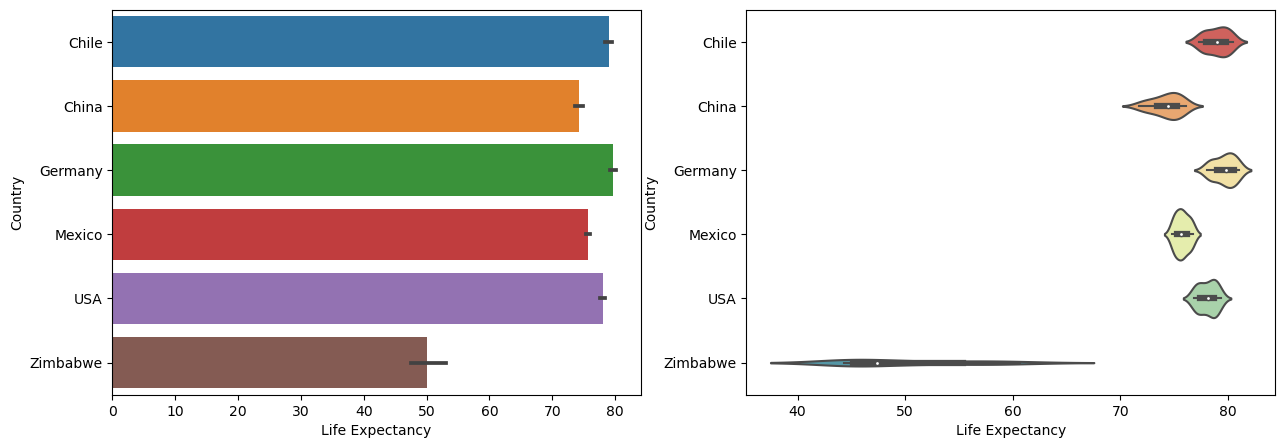

In [9]:
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.barplot(x="Life Expectancy", y="Country", data=gdp_data)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)


plt.subplot(1,2,2)
ax = sns.violinplot(x='Life Expectancy', y='Country', data=gdp_data, palette='Spectral')
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
plt.show()

The violin plot in Figure 2 shows the life expectancy in years for six countries. The countries with the highest life expectancy are Germany, the United States, and Chile, where Life expectancy is distributed mainly between 70 and 80 years, this means that the average life expectancy is well distributed and doesn't vary much for all countries except for Zimbabwe, which has an average life expectancy of around 50 years.

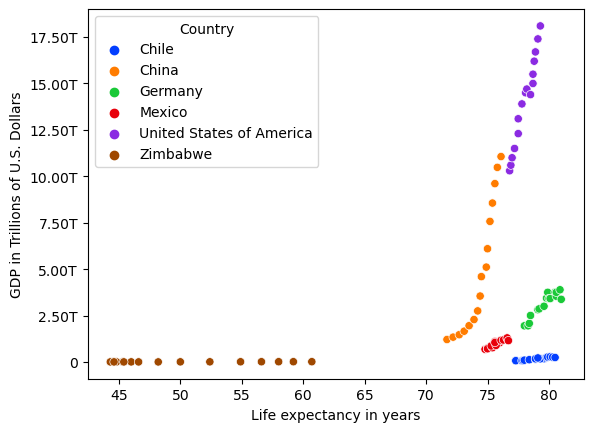

In [16]:
# scatterplot to visualize GDP compared to Life expectancy by country

def readable_numbers(x, pos):
  """Takes a large number and formats it into K, M, B, T to make it more readable.
      (200k, 1M, 3.5B, 2T)"""
  if x >= 1e12:
    s = '{:1.2f}T'.format(x * 1e-12)  
  elif x >= 1e9:
    s = '{:1.2f}B'.format(x * 1e-9)  
  elif x >= 1e6:
        s = '{:1.1f}M'.format(x * 1e-6)
  elif x >= 1e3:
    s = '{:1.0f}K'.format(x * 1e-3)
  else:
    s = '{:1.0f}'.format(x)
  return s


ax = sns.scatterplot(data=gdp_data, x='Life Expectancy', y='GDP', hue='Country', palette='bright')
ax.yaxis.set_major_formatter(readable_numbers)
ax.set(ylabel="GDP in Trillions of U.S. Dollars")
plt.xlabel('Life expectancy in years')
plt.show()


In general one can see an increase in GDP and life expectancy, exhibiting a positive correlation. To better demonstrate this correlation we can plot a FacetGrid for each country.

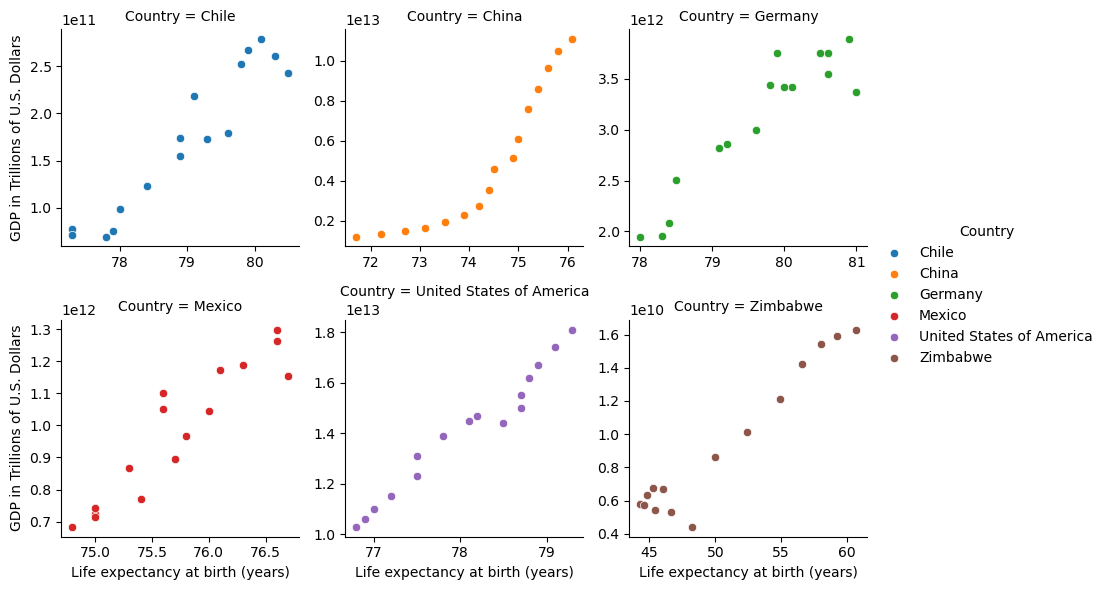

In [17]:
# Facetgrid is a multi-plot grid for plotting conditional relationships.
# col_wrap=3 limits the number of subplots in each row of the grid to 3.
# sharey=False and sharex=False arguments tell seaborn not to share the
# y-axis and x-axis scales between the subplots. 

graph = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,            
                      hue = "Country", sharey= False, sharex= False)

graph = (graph.map(sns.scatterplot,"Life Expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

we can definitely see a positive correlation between GDP and Life Expectancy, to better understand this relationship we can further explore GDP by country and see how it affects Life expectancy.

Text(0.5, 0, 'GDP in trillions of Dollars')

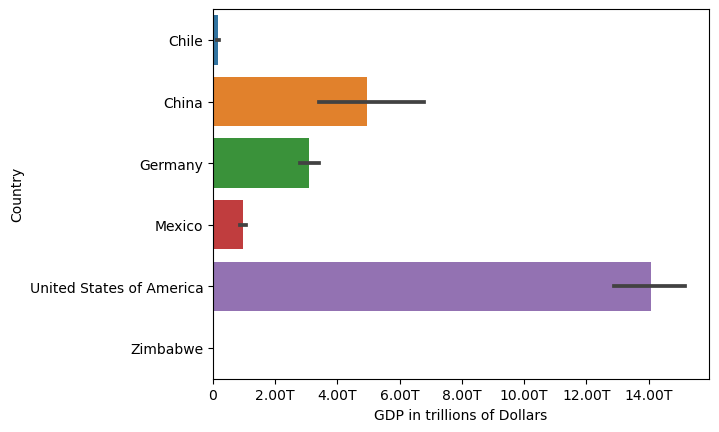

In [25]:
# barplot to compare GDP by country

ax = sns.barplot(x="GDP", y="Country", data=gdp_data)
ax.xaxis.set_major_formatter(readable_numbers)        # calls function 'readable_numbers' to format GDP label in Trillions of U.S. Dollars
plt.xlabel('GDP in trillions of Dollars')


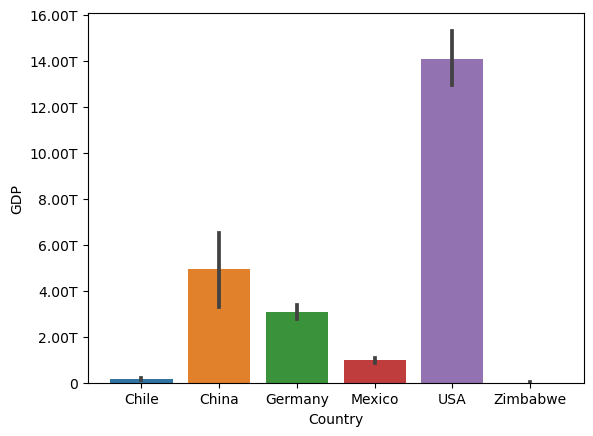

<Figure size 640x480 with 0 Axes>

In [26]:
# alternative graph for the above barplot
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']


ax = sns.barplot(x='Country', y='GDP', data=gdp_data)
ax=plt.subplot()
ax.yaxis.set_major_formatter(readable_numbers) 
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.plot()
plt.show()
plt.clf()

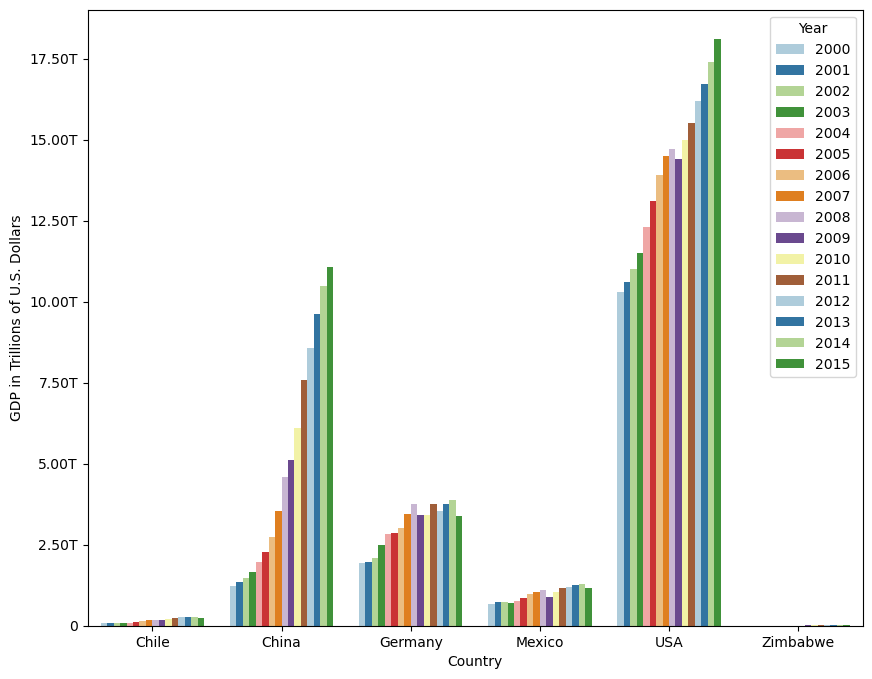

In [33]:
# compare GDP by country and year

#convert year to string to avoid errors
gdp_data['Year'] = gdp_data['Year'].astype(str)

# labels for X axis so they can be easier to read
labels=['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']

ax = plt.subplots(figsize=(10, 8)) 
ax = sns.barplot(x="Country", y="GDP", hue="Year", data=gdp_data, palette=sns.color_palette("Paired"))
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(readable_numbers) 
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.show()

The United States has a higher GDP in average than any other country, the GDP of Zimbabwe is barely visible which shows their extremely low GDP, to see the increase of GDP per Year we could explore GDP using a lineplot.

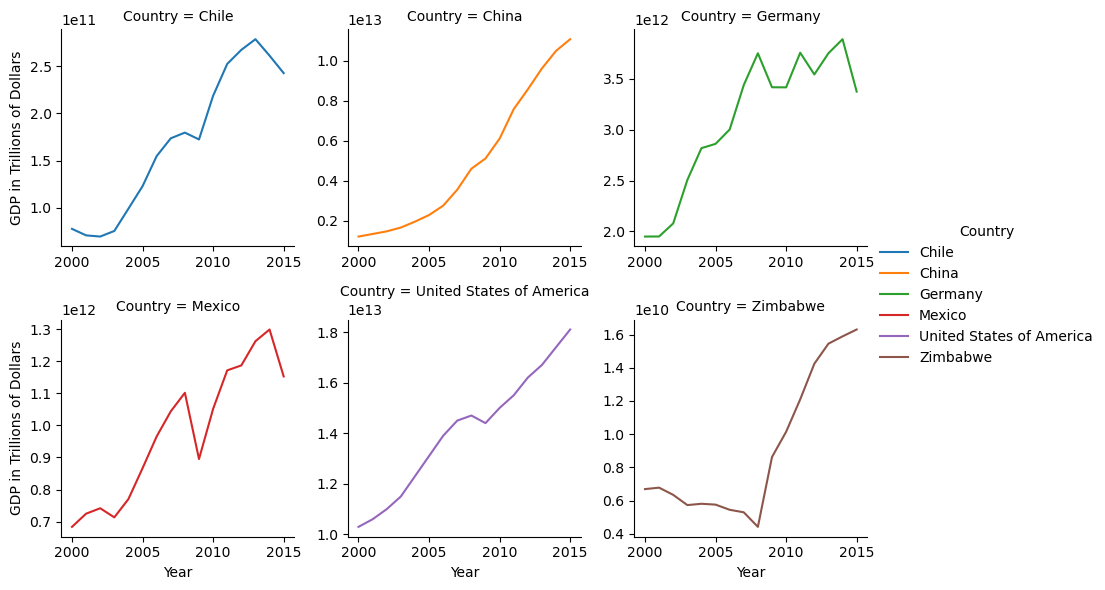

In [36]:
# explore more in detail the change of GDP by country over the years
# using a Facetgrid from seaborne.

#convert year to int64, this is done to avoid the X label to be stacked
gdp_data['Year'] = gdp_data['Year'].astype('int64')

# ignore FutureWarnings from Seaborn library to avoid cluttering the output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

graphGDP = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex=False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of Dollars"))

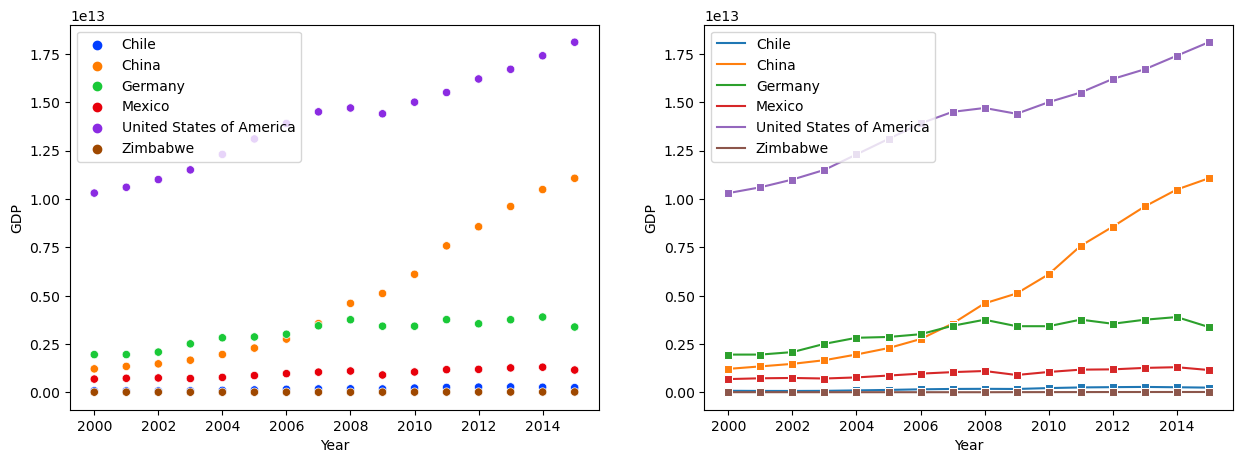

In [37]:
# Here we will examine GDP by country against the others, to compare the growth
# of each country over the years.

# plot 1 GDP by country and year using scatterplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=gdp_data, x='Year', y='GDP', hue='Country', palette='bright')
plt.legend(loc=2)

# plot 2 GDP by country and year using lineplot
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=gdp_data, hue='Country', marker='s')
plt.legend(loc=2)
plt.show()

After exploring the GDP in more detail we can see that the GDP has been increasing even in Zimbabwe whose GDP was extremely low and hardly visible in the initial graph comparing GDP by country.

Finally we can take a look to how life expectancy has changed over the years in more detail.

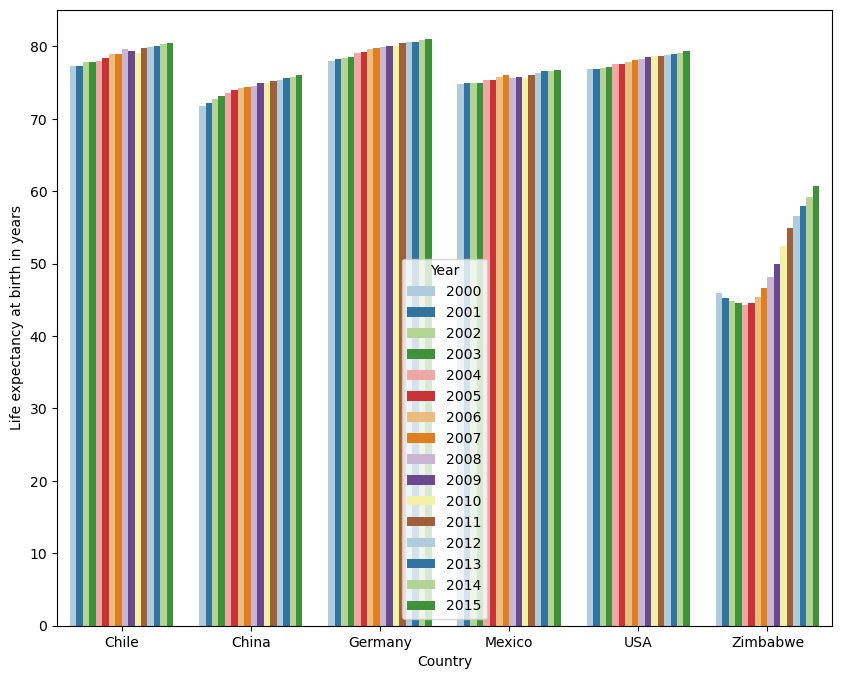

In [63]:
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']

ax = plt.subplots(figsize=(10, 8)) 
ax = sns.barplot(x="Country", y="Life Expectancy", hue="Year", data=gdp_data, palette=sns.color_palette("Paired"))
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.ylabel(ylabel)
ax.set(ylabel="Life expectancy at birth in years")
plt.show()

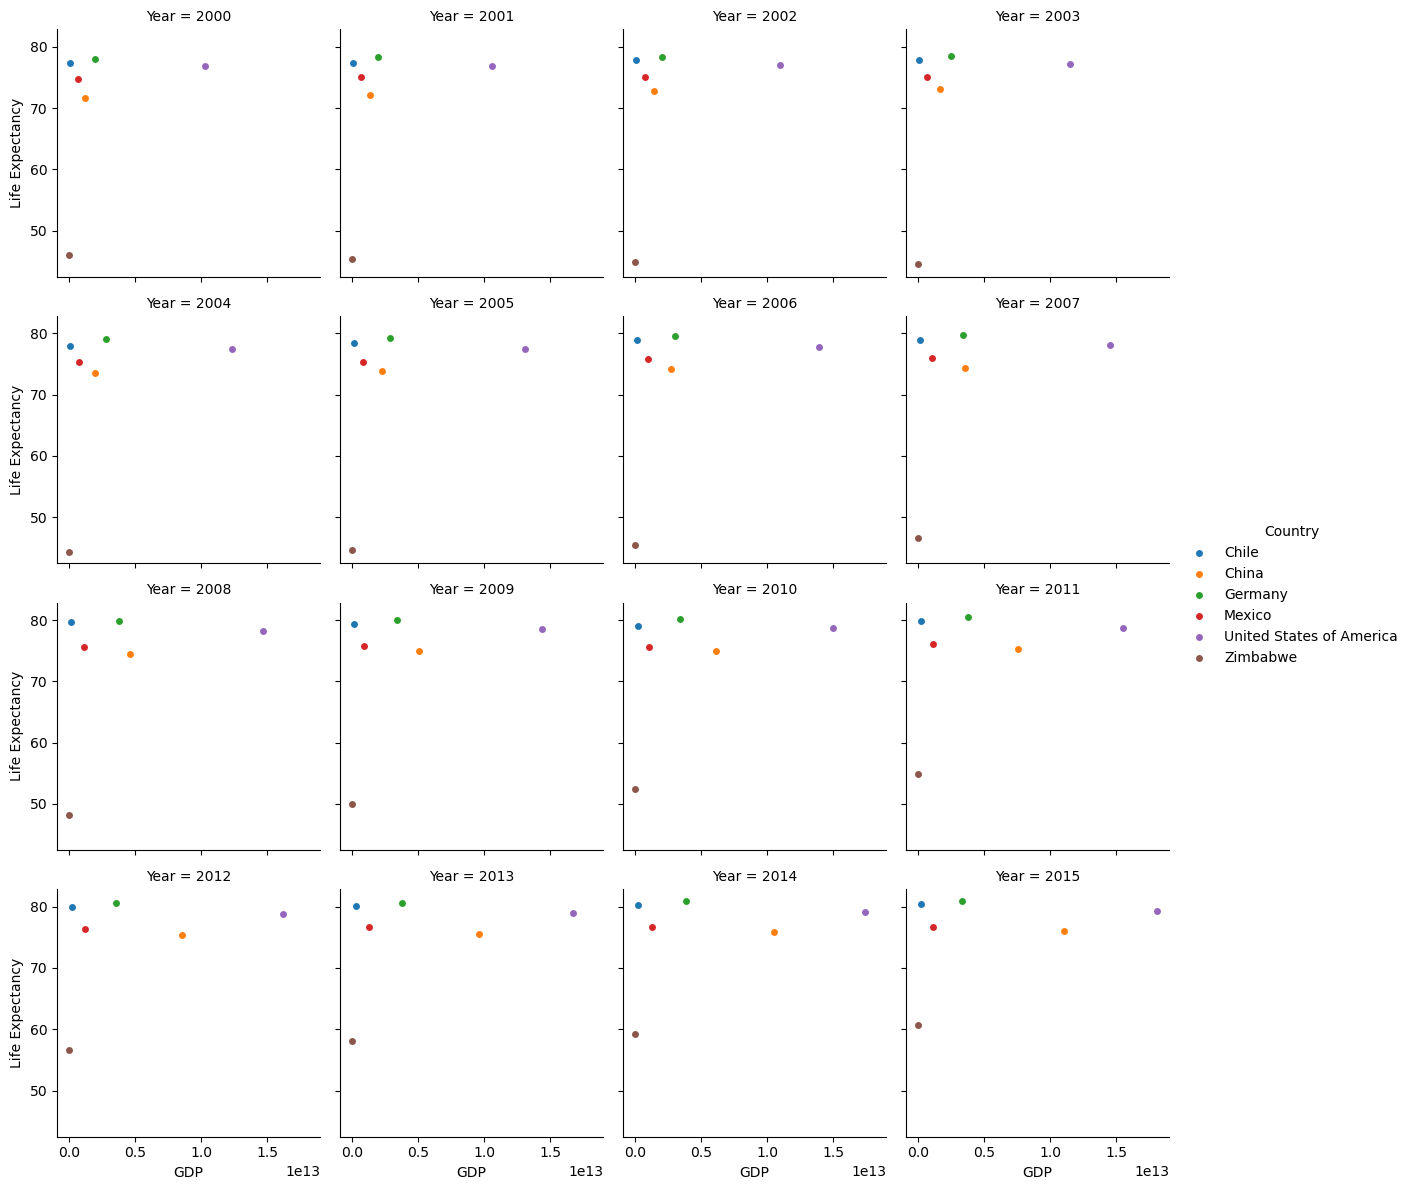

In [64]:
g = sns.FacetGrid(gdp_data, col="Year", hue="Country", col_wrap=4)
g = (g.map(plt.scatter, "GDP", "Life Expectancy", edgecolor="w").add_legend())

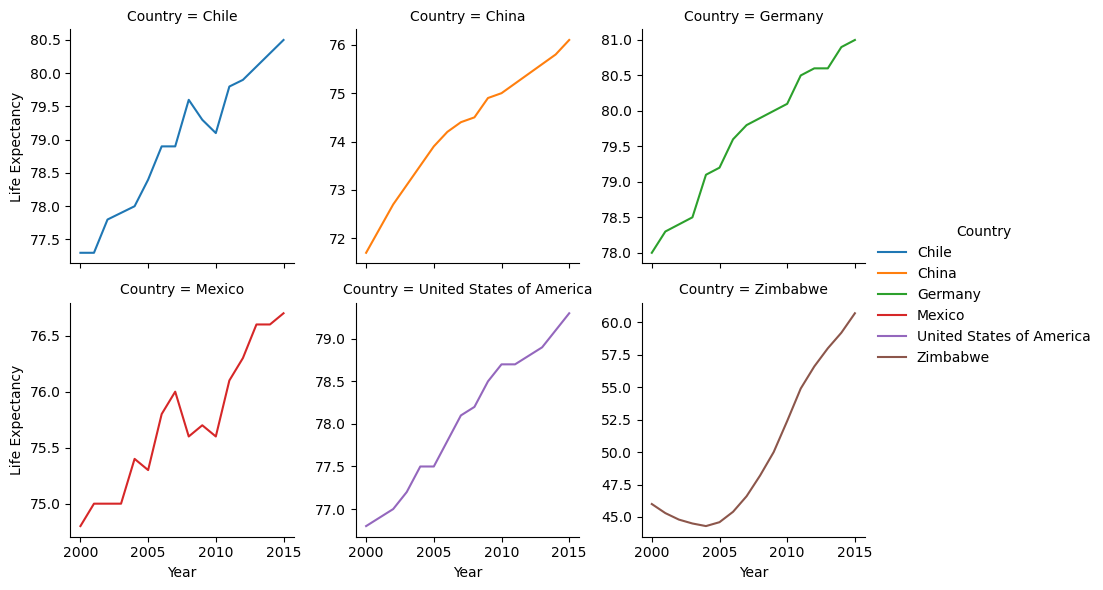

In [75]:
# explore more in detail the change of GDP by country

#convert year to int64, this is done to avoid the X label to be stacked
gdp_data['Year'] = gdp_data['Year'].astype('int64')

graphlife = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphlife = (graphlife.map(sns.lineplot,"Year","Life Expectancy")
         .add_legend()
         .set_axis_labels("Year","Life Expectancy"))
